In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
import seaborn as sns

plt.style.use('bmh')

In [124]:


import seaborn as sns

In [125]:
h = pd.read_csv("don_app.csv",sep=";")

In [126]:
h.isnull().any()

valeur_fonciere               True
adresse_numero                True
adresse_nom_voie             False
adresse_code_voie             True
code_type_local              False
type_local                   False
surface_reelle_bati           True
nombre_pieces_principales     True
surface_terrain               True
longitude                     True
latitude                      True
dtype: bool

In [127]:
h.columns[h.isnull().any()]

Index(['valeur_fonciere', 'adresse_numero', 'adresse_code_voie',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

In [128]:
h.isnull().sum()

valeur_fonciere                41
adresse_numero                461
adresse_nom_voie                0
adresse_code_voie             308
code_type_local                 0
type_local                      0
surface_reelle_bati          1175
nombre_pieces_principales     739
surface_terrain               428
longitude                      23
latitude                       23
dtype: int64

In [133]:
h.isnull().sum().sum()

0

In [134]:
column_with_nan = h.columns[h.isnull().any()]
for column in column_with_nan:
  print(column, h[column].isnull().sum())

if h[column].isnull().sum()*100.0/h.shape[0] > 50:
  h.drop(column,1, inplace=True)

In [135]:
h.index[h.isnull().any(axis=1)]
index_with_nan = h.index[h.isnull().any(axis=1)]
index_with_nan.shape
h.drop(index_with_nan,0, inplace=True)
h.shape

C:\Users\Ordi\AppData\Local\Temp\ipykernel_212\2068585279.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  h.drop(index_with_nan,0, inplace=True)


(1250, 11)

In [140]:
h

,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,26.0,RUE DELILLE,582.0,1,Maison,129.0,4.0,351.0,1.071855,49.401886
2,160000.0,13.0,RUE ALFRED DE MUSSET,40.0,1,Maison,64.0,4.0,452.0,1.070963,49.402764
3,174000.0,21.0,RUE PAUL VERLAINE,1920.0,1,Maison,64.0,4.0,498.0,1.070475,49.403622
5,200000.0,2.0,RUE DU MADRILLET,1580.0,2,Appartement,18.0,1.0,105.0,1.074902,49.403036
6,200000.0,2.0,RUE DU MADRILLET,1580.0,4,Local industriel. commercial ou assimilé,68.0,0.0,105.0,1.074902,49.403036
...,...,...,...,...,...,...,...,...,...,...,...
2681,10000.0,19.0,RUE HECTOR MALOT,1120.0,2,Appartement,65.0,3.0,493.0,1.064936,49.396092
2682,10000.0,19.0,RUE HECTOR MALOT,1120.0,2,Appartement,66.0,3.0,493.0,1.064936,49.396092
2683,10000.0,19.0,RUE HECTOR MALOT,1120.0,2,Appartement,80.0,4.0,493.0,1.064936,49.396092
2684,10000.0,19.0,RUE HECTOR MALOT,1120.0,2,Appartement,65.0,3.0,493.0,1.064936,49.396092


In [165]:
prix=h.iloc[:,0].values


13720000.0


10000.0

In [178]:
taille=len(prix)-1
prix_trs=0
for i in range(taille):
    if prix[i] >100000:
        prix_trs[i]=np.log(prix[i])



TypeError: 'int' object does not support item assignment

C:\Users\Ordi\AppData\Local\Temp\ipykernel_212\2729097862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prix)


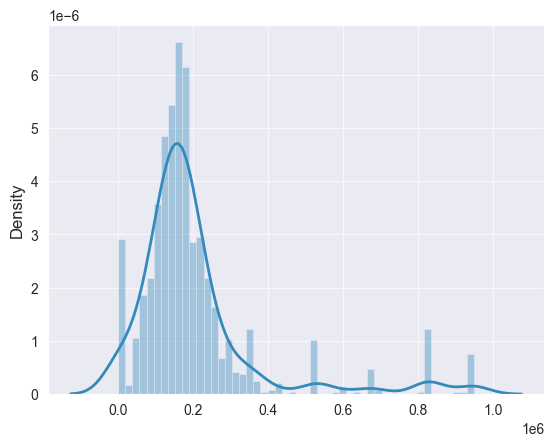

C:\Users\Ordi\AppData\Local\Temp\ipykernel_212\2729097862.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prix_trs)
c:\Users\Ordi\miniconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<AxesSubplot: ylabel='Density'>

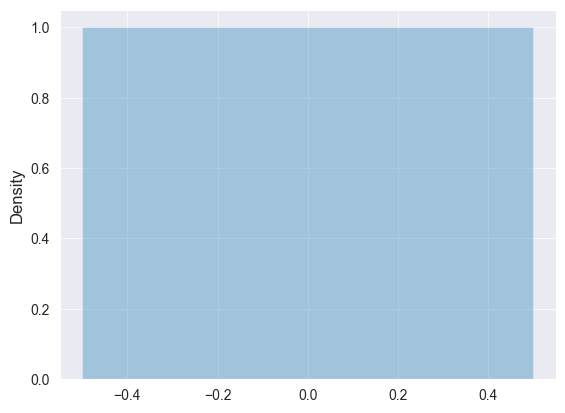

In [179]:

sns.set_style('darkgrid')
sns.distplot(prix)
plt.show()
sns.set_style('darkgrid')
sns.distplot(prix_trs)

C:\Users\Ordi\AppData\Local\Temp\ipykernel_212\1918038549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(h.corr())


<AxesSubplot: >

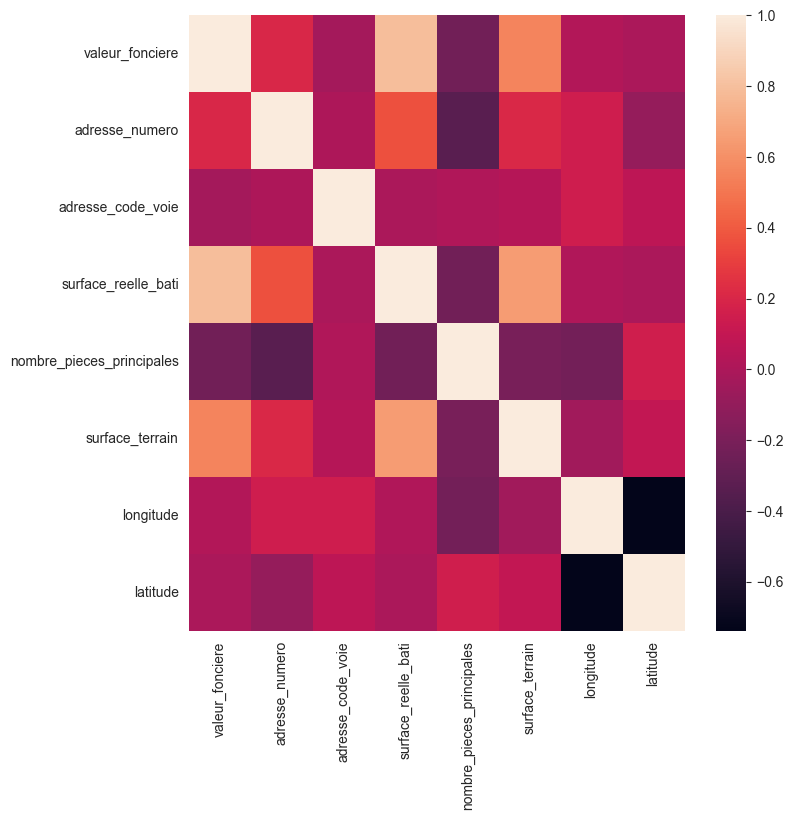

In [147]:
plt.figure(figsize=(8,8))
sns.heatmap(h.corr())